<a href="https://colab.research.google.com/github/Ashithrai507/learn/blob/main/kag_road.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy scikit-learn lightgbm matplotlib joblib



#Intsall all the dependencies

In [ ]:
pip install lightgbm==3.3.5


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.1 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.6.0
    Uninstalling lightgbm-4.6.0:
      Successfully uninstalled lightgbm-4.6.0


#load and train and test dataset


In [ ]:
import pandas as pd
import numpy as np

# Load train and test data
train = pd.read_csv("/content/drive/MyDrive/kaggle/road_acc/playground-series-s5e10/train.csv")
test = pd.read_csv("/content/drive/MyDrive/kaggle/road_acc/playground-series-s5e10/test.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)
train.head()


Train shape: (517754, 14)
Test shape: (172585, 13)


,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


#Preprocess the dataset
###step1: seperate the feature & target
###step2: Encode the target
###step3:Handle missing values
###step4:detect catogories and numerical columns
###step5:One Hot Encoding for categorical columns
###step6:Scale numerical values
###step7:Train-validation split

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
X = train.drop("accident_risk", axis=1)
y = train["accident_risk"]

le = LabelEncoder()
y = le.fit_transform(y)

X = X.fillna(X.mode().iloc[0])

cat_cols = X.select_dtypes(include=["object", "category"]).columns
num_cols = X.select_dtypes(exclude=["object", "category"]).columns

ct = ColumnTransformer([
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
], remainder='passthrough')

X_encoded = ct.fit_transform(X)

scaler = StandardScaler()
X_encoded = scaler.fit_transform(X_encoded)
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report


num_classes = len(np.unique(y_train))

lgb_model = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=num_classes,
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=64,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

callbacks = [
    lgb.early_stopping(stopping_rounds=50),
    lgb.log_evaluation(period=50)
]

# Train
lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='multi_logloss',
    callbacks=callbacks
)

# Predict
y_pred = lgb_model.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050892 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 476
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 21
[LightGBM] [Info] Start training from score -6.758244
[LightGBM] [Info] Start training from score -5.755566
[LightGBM] [Info] Start training from score -5.427520
[LightGBM] [Info] Start training from score -5.497494
[LightGBM] [Info] Start training from score -5.548260
[LightGBM] [Info] Start training from score -5.185220
[LightGBM] [Info] Start training from score -4.717483
[LightGBM] [Info] Start training from score -4.969608
[LightGBM] [Info] Start training from score -4.798179
[LightGBM] [Info] Start training from score -4.879589
[LightGBM] [Info] Start training from score -6.600832
[LightGBM] [Info] Start training from score -4.514531

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Validation Accuracy: 0.05569236414906664
              precision    recall  f1-score   support

           0       0.04      0.06      0.05       127
           1       0.18      0.25      0.21       302
           2       0.22      0.23      0.22       466
           3       0.21      0.15      0.17       428
           4       0.18      0.09      0.12       389
           5       0.16      0.04      0.07       602
           6       0.19      0.09      0.12       947
           7       0.21      0.10      0.13       703
           8       0.09      0.02      0.03       849
           9       0.09      0.02      0.03       844
          10       0.24      0.27      0.25       139
          11       0.12      0.03      0.04      1122
          12       0.12      0.01      0.02      1117
          13       0.17      0.02      0.04      1286
          14       0.11      0.01      0.02      1093
          15       0.09      0.01      0.01      1442
          16       0.00      0.00      0

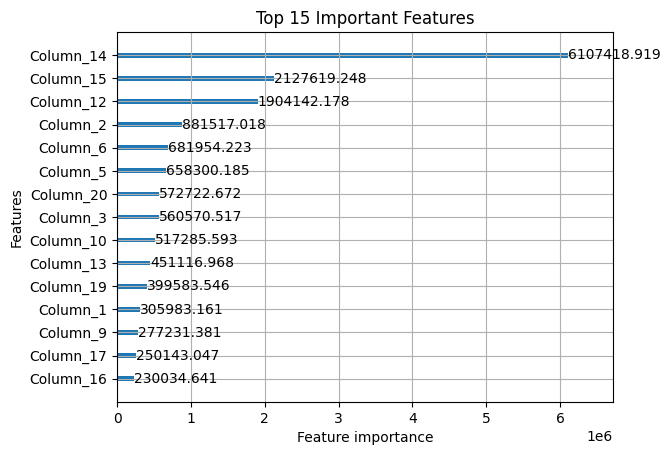

In [ ]:
import matplotlib.pyplot as plt
lgb.plot_importance(lgb_model, max_num_features=15, importance_type='gain')
plt.title("Top 15 Important Features")
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb

# Define model
lgb_model = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=num_classes,
    class_weight='balanced',
    random_state=42
)

# Define parameter grid
param_grid = {
    'num_leaves': [31, 64, 128],
    'max_depth': [-1, 10, 20, 30],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [300, 500, 800],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Create search object
search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the search
search.fit(X_train, y_train)

# ✅ Now it’s safe to access the best estimator
print("Best parameters:", search.best_params_)
best_model = search.best_estimator_


Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
X_test = test.copy()
X_test = X_test.fillna(X_test.mode().iloc[0])
X_test = ct.transform(X_test)
X_test = scaler.transform(X_test)

best_model = search.best_estimator_ if 'search' in locals() else lgb_model
test_preds = best_model.predict(X_test)

test_preds = le.inverse_transform(test_preds)

pd.DataFrame({'accident_risk_prediction': test_preds}).to_csv("final_predictions.csv", index=False)


In [ ]:
import joblib
joblib.dump(best_model, "accident_risk_model.pkl")
joblib.dump(ct, "column_transformer.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le, "label_encoder.pkl")
